In [242]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

import matplotlib.pyplot as plt
%matplotlib inline


print('Libraries imported.')

Libraries imported.


#### Reading venue data stored on Git into city_venues

In [14]:
city_venues=pd.read_csv("https://raw.githubusercontent.com/dibyendutapadar/mumbai_city_analysis/master/Mumbai_venues.csv")
city_venues.drop(['Unnamed: 0'],axis=1,inplace=True)

print(city_venues.shape)
city_venues.head()

(11328, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarey Milk Colony,19.156129,72.870722,Aarey Garden Restaurant,19.155514,72.878236,Indian Restaurant
1,Aarey Milk Colony,19.156129,72.870722,Panchvati Fast Food Corner,19.157628,72.874506,Fast Food Restaurant
2,Aarey Milk Colony,19.156129,72.870722,Chota Kashmir Boating,19.160905,72.872482,Lake
3,Aarey Milk Colony,19.156129,72.870722,Chota Kashmir,19.163542,72.873487,Monument / Landmark
4,Abhyudaya Nagar,18.990477,72.844057,Ladu Samrat,18.994526,72.836574,Indian Restaurant


### there are about 236 venue_types in the file. A lot of them are overlapping and similar. for the purpose of analysis, we have reduced the venue types to 14 and the existing venue types are mapped to the new venue types intended at understanding the type of locality

In [333]:
venue_map=pd.read_csv('https://raw.githubusercontent.com/dibyendutapadar/mumbai_city_analysis/master/venue_category_mapping.csv',encoding='latin-1')
venue_map['Venue Mapping'].unique()

array(['regular_restaurants', 'nature_view', 'tourist_interest',
       'shopping', 'transport_vicinity', 'business_hub',
       'stores_daily_conveniences', 'sports_fitness', 'café_fastfoods',
       'cuisine_restaurants', 'arts_culture_recreation', 'bars_nightlife',
       'kids_family_residential', 'education_colleges'], dtype=object)

### Merging the mapped venues wiuth the exoisting venue categories

In [335]:
city_venue=pd.merge(city_venues,venue_map,on='Venue Category',how='left')
city_venue.head().sort_values('Neighborhood',ascending=True)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Mapping
0,Aarey Milk Colony,19.156129,72.870722,Aarey Garden Restaurant,19.155514,72.878236,Indian Restaurant,regular_restaurants
1,Aarey Milk Colony,19.156129,72.870722,Panchvati Fast Food Corner,19.157628,72.874506,Fast Food Restaurant,regular_restaurants
2,Aarey Milk Colony,19.156129,72.870722,Chota Kashmir Boating,19.160905,72.872482,Lake,nature_view
3,Aarey Milk Colony,19.156129,72.870722,Chota Kashmir,19.163542,72.873487,Monument / Landmark,tourist_interest
4,Abhyudaya Nagar,18.990477,72.844057,Ladu Samrat,18.994526,72.836574,Indian Restaurant,regular_restaurants


In [ ]:
## Applying one hot encoding to the venue mapping column

In [337]:
city_onehot = pd.get_dummies(city_venue[['Venue Mapping']], prefix="", prefix_sep="")
#print(Toronto_onehot.head())
# add neighborhood column back to dataframe
city_onehot['Neighborhood'] = city_venue['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_onehot.head().sort_values('Neighborhood',ascending=True)

,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,café_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,Aarey Milk Colony,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Aarey Milk Colony,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Aarey Milk Colony,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Aarey Milk Colony,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Abhyudaya Nagar,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [381]:
city_onehot_export=city_onehot
city_onehot['Neighborhood Latitude'] = city_venue['Neighborhood Latitude'] 
city_onehot['Neighborhood Longitude'] = city_venue['Neighborhood Longitude']
city_onehot['Venue'] = city_venue['Venue']
city_onehot['Venue Latitude'] = city_venue['Venue Latitude']
city_onehot['Venue Longitude'] = city_venue['Venue Longitude']
city_onehot['Venue Category'] = city_venue['Venue Category']
city_onehot['Venue Mapping'] = city_venue['Venue Mapping']
city_onehot.to_csv('city_onehot.csv')
city_onehot_export.head()


,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,café_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Mapping
0,Aarey Milk Colony,0,0,0,0,0,0,0,0,1,0,0,0,0,0,19.156129,72.870722,Aarey Garden Restaurant,19.155514,72.878236,Indian Restaurant,regular_restaurants
1,Aarey Milk Colony,0,0,0,0,0,0,0,0,1,0,0,0,0,0,19.156129,72.870722,Panchvati Fast Food Corner,19.157628,72.874506,Fast Food Restaurant,regular_restaurants
2,Aarey Milk Colony,0,0,0,0,0,0,0,1,0,0,0,0,0,0,19.156129,72.870722,Chota Kashmir Boating,19.160905,72.872482,Lake,nature_view
3,Aarey Milk Colony,0,0,0,0,0,0,0,0,0,0,0,0,1,0,19.156129,72.870722,Chota Kashmir,19.163542,72.873487,Monument / Landmark,tourist_interest
4,Abhyudaya Nagar,0,0,0,0,0,0,0,0,1,0,0,0,0,0,18.990477,72.844057,Ladu Samrat,18.994526,72.836574,Indian Restaurant,regular_restaurants


In [338]:
## Grouping Neighborhoods by the sum of the venue_types

In [339]:
city_grouped = city_onehot.groupby('Neighborhood').sum().reset_index()
city_grouped

,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,café_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,Aarey Milk Colony,0,0,0,0,0,0,0,1,2,0,0,0,1,0
1,Abhyudaya Nagar,0,0,1,0,0,0,0,0,2,1,1,1,0,1
2,Airoli,0,0,0,2,1,0,0,0,6,0,1,1,0,1
3,Alika Nagar,1,0,0,6,0,0,0,0,2,1,0,1,0,0
4,Ambedkar Nagar,3,14,0,24,17,0,0,2,21,1,5,8,0,1
5,Amboli,1,0,0,3,0,0,1,0,8,0,3,2,0,0
6,Amrut Nagar,1,7,0,5,4,0,1,0,17,1,4,7,0,0
7,Anand Nagar,6,12,0,60,6,0,3,3,45,0,12,45,9,15
8,Andheri (East),1,2,0,7,1,0,0,1,21,2,0,5,2,2
9,Andheri (West),7,5,0,11,1,0,1,0,15,0,4,9,1,0


In [340]:
# normalizing data  


for k in range(1,15):
    city_grouped[city_grouped.columns[k]]=(city_grouped[city_grouped.columns[k]]-city_grouped[city_grouped.columns[k]].mean())/city_grouped[city_grouped.columns[k]].std()
city_grouped.sort_values('bars_nightlife', ascending=False)

,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,café_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
318,Shastri Nagar,4.198348,7.313339,-0.233678,4.098233,6.081752,-0.183863,2.284000,-0.600327,5.324927,1.812255,4.268425,4.975521,-0.503561,-0.635851
123,Linking Road,-0.119664,3.791662,-0.233678,1.433739,3.755468,-0.183863,0.812268,-0.600327,1.643744,-0.552399,2.702004,0.883295,-0.503561,0.065117
59,Evershine Nagar,-0.119664,3.791662,-0.233678,1.433739,0.764532,-0.183863,2.284000,-0.600327,1.328214,-0.552399,0.091303,2.086891,0.248698,-0.635851
112,Khar West,1.114054,3.584504,-0.233678,1.747209,4.087794,-0.183863,-0.659465,0.346741,1.012684,2.994582,2.179864,1.364733,-0.503561,0.766086
76,Hanuman Nagar,4.198348,3.584504,-0.233678,2.217414,1.429184,-0.183863,-0.659465,3.187946,2.379981,-0.552399,2.179864,2.086891,2.505475,-0.635851
111,Khar,1.114054,3.584504,-0.233678,1.747209,4.087794,-0.183863,-0.659465,0.346741,1.012684,2.994582,2.179864,1.364733,-0.503561,0.766086
94,Jogeshwari (West),1.730913,3.377347,-0.233678,1.120269,1.761511,-0.183863,0.812268,-0.600327,1.538568,0.629928,1.657724,0.642576,-0.503561,-0.635851
124,Louis Wadi,-0.119664,3.170189,-0.233678,0.336595,-0.232447,-0.183863,0.812268,-0.600327,0.907508,-0.552399,0.091303,0.883295,-0.503561,-0.635851
77,Hemu Colony,1.730913,3.170189,-0.233678,1.277004,3.090816,-0.183863,0.812268,-0.600327,2.274804,0.629928,1.657724,2.086891,-0.503561,-0.635851
162,Nehru Nagar,1.114054,2.963032,4.267699,0.806799,2.426163,-0.183863,-0.659465,0.346741,2.169627,4.176909,0.091303,1.605452,1.000957,0.766086


In [341]:
## function to return the top venues per neighborhood

In [342]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [343]:
num_top_venues = 14

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = city_grouped['Neighborhood']

for ind in np.arange(city_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue
0,Aarey Milk Colony,nature_view,tourist_interest,education_colleges,business_hub,shopping,bars_nightlife,cuisine_restaurants,transport_vicinity,kids_family_residential,arts_culture_recreation,regular_restaurants,stores_daily_conveniences,café_fastfoods,sports_fitness
1,Abhyudaya Nagar,business_hub,shopping,transport_vicinity,education_colleges,sports_fitness,tourist_interest,bars_nightlife,stores_daily_conveniences,cuisine_restaurants,nature_view,kids_family_residential,arts_culture_recreation,regular_restaurants,café_fastfoods
2,Airoli,transport_vicinity,education_colleges,cuisine_restaurants,business_hub,regular_restaurants,sports_fitness,tourist_interest,shopping,bars_nightlife,stores_daily_conveniences,nature_view,café_fastfoods,kids_family_residential,arts_culture_recreation
3,Alika Nagar,shopping,café_fastfoods,arts_culture_recreation,education_colleges,business_hub,tourist_interest,bars_nightlife,stores_daily_conveniences,cuisine_restaurants,nature_view,transport_vicinity,kids_family_residential,regular_restaurants,sports_fitness
4,Ambedkar Nagar,cuisine_restaurants,café_fastfoods,bars_nightlife,sports_fitness,nature_view,regular_restaurants,stores_daily_conveniences,arts_culture_recreation,shopping,transport_vicinity,education_colleges,business_hub,tourist_interest,kids_family_residential


In [350]:
# dropping stores regular restaurants and cafes as they are quite abundant and available in each areas

city_grouped_clustering = city_grouped.drop(['Neighborhood','stores_daily_conveniences','regular_restaurants'], 1)

distance=[]

kclusters= range(1,20)
for k in kclusters:
# run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(city_grouped_clustering)
    distance.append(kmeans.inertia_)


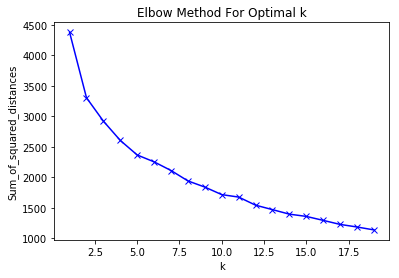

In [351]:
# Checking the elbow to find th emost desirable K-value

plt.plot(kclusters,distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [353]:
# selecting the number of clusters as 12

kclusters = 12


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_grouped_clustering)
 
#neighborhoods_venues_sorted.drop(['Cluster Labels'],axis=1,inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [354]:
# defining the final city data with cluster
city_final = city_venue

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
city_final = city_venue.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# 
city_plot=city_final[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Cluster Labels']].groupby(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude'],as_index=False).mean()
city_plot.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels
0,Aarey Milk Colony,19.156129,72.870722,2
1,Abhyudaya Nagar,18.990477,72.844057,6
2,Airoli,19.158515,72.999402,2
3,Alika Nagar,19.198397,72.874267,2
4,Ambedkar Nagar,19.070822,72.828865,4


In [356]:
## Checking the distribution of the clusters

In [355]:
clusters=city_plot[['Neighborhood','Cluster Labels']].groupby(['Cluster Labels'],as_index=False).count().sort_values('Neighborhood',ascending=False)
clusters.sort_values('Cluster Labels')

,Cluster Labels,Neighborhood
0,0,49
1,1,11
2,2,127
3,3,8
4,4,14
5,5,38
6,6,11
7,7,60
8,8,2
9,9,6


In [358]:
# Checking the most common venue for each clusters

In [357]:
cluster_label_name=city_final[['Cluster Labels','1st Most Common Venue','Neighborhood']].groupby(['Cluster Labels','1st Most Common Venue'],as_index=False).count().sort_values(['Neighborhood'],ascending=False)
cluster_label_name.head(11)

,Cluster Labels,1st Most Common Venue,Neighborhood
11,1,education_colleges,1014
43,7,kids_family_residential,817
6,0,shopping,741
26,4,bars_nightlife,667
23,3,business_hub,558
31,5,arts_culture_recreation,517
54,11,tourist_interest,453
35,5,kids_family_residential,390
22,2,transport_vicinity,386
36,5,regular_restaurants,379


In [375]:
# create map
latitude = city_plot['Neighborhood Latitude'].mean()
longitude = city_plot['Neighborhood Longitude'].mean()


map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# for c in range(0,11)
# print(cluster_label_name.iloc[c]['1st Most Common Venue'].unique())

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
col_scale = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_plot['Neighborhood Latitude'], city_plot['Neighborhood Longitude'], city_plot['Neighborhood'], city_plot['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster-1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7.5,
        popup=label,
        color=None,
        fill=True,
        fill_color=col_scale[cluster-1],
        fill_opacity=.8).add_to(map_clusters)

# Creating legend
for c in range(0,len(colors_array)):
    r=int(colors_array[c][0]*255)
    g=int(colors_array[c][1]*255)
    b=int(colors_array[c][2]*255)
    group =folium.FeatureGroup(name='<span style=\\"color:rgb({},{},{},{});\\">{}</span>'.format(r,g,b,1,str(c)+"-"+cluster_label_name.iloc[c]['1st Most Common Venue']))
    group.add_to(map_clusters)


folium.map.LayerControl('topright', collapsed=False).add_to(map_clusters)



map_clusters.save(outfile="clusters.html")

In [371]:
city_final[['Cluster Labels','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']].drop_duplicates().sort_values('Cluster Labels')

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11297,0,sports_fitness,regular_restaurants,café_fastfoods,arts_culture_recreation,education_colleges
1457,0,café_fastfoods,sports_fitness,arts_culture_recreation,regular_restaurants,nature_view
1494,0,regular_restaurants,nature_view,stores_daily_conveniences,sports_fitness,arts_culture_recreation
1811,0,cuisine_restaurants,shopping,tourist_interest,café_fastfoods,regular_restaurants
8315,0,arts_culture_recreation,shopping,tourist_interest,café_fastfoods,regular_restaurants
8086,0,shopping,stores_daily_conveniences,sports_fitness,cuisine_restaurants,transport_vicinity
8041,0,shopping,stores_daily_conveniences,sports_fitness,transport_vicinity,nature_view
4029,0,shopping,regular_restaurants,stores_daily_conveniences,sports_fitness,tourist_interest
2220,0,nature_view,shopping,café_fastfoods,stores_daily_conveniences,sports_fitness
2293,0,shopping,arts_culture_recreation,stores_daily_conveniences,café_fastfoods,bars_nightlife


In [376]:
(city_final[['Cluster Labels','1st Most Common Venue','Neighborhood']].groupby(['Cluster Labels','1st Most Common Venue'],as_index=False).count()).groupby(['Cluster Labels','1st Most Common Venue'],as_index=False).max()

,Cluster Labels,1st Most Common Venue,Neighborhood
0,0,arts_culture_recreation,242
1,0,café_fastfoods,94
2,0,cuisine_restaurants,140
3,0,kids_family_residential,34
4,0,nature_view,63
5,0,regular_restaurants,157
6,0,shopping,741
7,0,sports_fitness,226
8,0,stores_daily_conveniences,50
9,0,tourist_interest,21
